In [3]:
from lmf import lmf #load the lmf calculator
import numpy as np
from ase.io import read
from ase.eos import calculate_eos
from ase.io.trajectory import Trajectory
import matplotlib.pyplot as plt
from ase.eos import EquationOfState as eos
from ase.units import Bohr,Rydberg
from ase.io.trajectory import TrajectoryReader as trread

In [4]:
from ase.io.trajectory import TrajectoryReader as trread

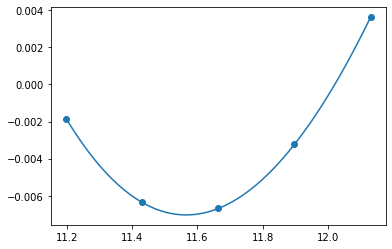

In [50]:
import matplotlib.pyplot as plt
plt.plot(eos.getplotdata()[4],eos.getplotdata()[5])
plt.scatter(eos.getplotdata()[6],eos.getplotdata()[7])

In [80]:
from ase.eos import EquationOfState as eos
from ase.units import Bohr,Rydberg
from ase.io.trajectory import TrajectoryReader as trread

In [81]:
def plot_v(v,e,ax,label,c):
    data=eos(v,e,eos='birchmurnaghan').getplotdata()
    
    ax.plot(data[4],data[5],c=c,label=label)
    ax.scatter(data[6],data[7],alpha=0.5,s=20,c=c,marker="o")

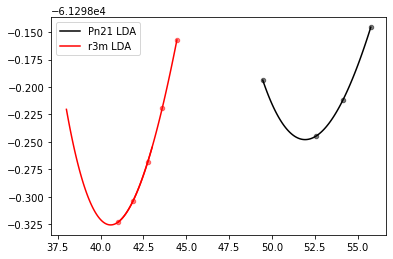

In [90]:
fig,ax=plt.subplots()

v=np.array([1418.665249,1461.652225,1505.498912,1335.236383])* Bohr**3 * 0.25
e=np.array([-18021.3517579,-18021.3420203,-18021.3225567,-18021.3367162])* 0.25 * Rydberg

plot_v(v,e,ax,label="Pn21 LDA",c="k")
ax.legend()

from ase.io.trajectory import Trajectory
traj = Trajectory('nagao2-r3m-lda.traj')
v=[i.get_volume() for i in traj]
e=[i.get_total_energy() * Rydberg for i in traj]

plot_v(v,e,ax,label="r3m LDA",c="r")

def murnaghan(V, E0, B0, BP, V0):
    'From PRB 28,5480 (1983'

    E = E0 + B0 * V / BP * (((V0 / V)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1)
    return E
data=eos(v,e,eos='murnaghan')
data.fit()
V=np.linspace(38,43,100)
E=murnaghan(V,data.eos_parameters[0],data.eos_parameters[1],data.eos_parameters[2],data.eos_parameters[3])
ax.plot(V,E,c="r")
ax.legend()



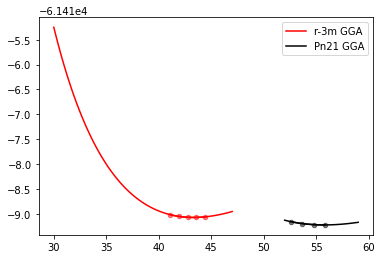

In [179]:
from ase.io.trajectory import Trajectory
def plot_v(v,e,ax,label,c,sub=0):
    data=eos(v,e-sub,eos='birchmurnaghan').getplotdata()
    
    ax.plot(data[4],data[5],c=c,label=label)
    ax.scatter(data[6],data[7],alpha=0.5,s=20,c=c,marker="o")

fig,ax=plt.subplots()


traj = Trajectory('nagao2-r3m-gga.traj')
v=[i.get_volume() for i in traj]
e1=np.array([i.get_total_energy() * Rydberg for i in traj])

plot_v(v,e1,ax,label="r-3m GGA",c="r")

eos_data=eos(v,e1,eos='murnaghan')
eos_data.fit()
V=np.linspace(40,47,100)
E=murnaghan(V,eos_data.eos_parameters[0],eos_data.eos_parameters[1],eos_data.eos_parameters[2],eos_data.eos_parameters[3])
ax.plot(V,E,c="r")
ax.legend()


from ase.io.trajectory import Trajectory
traj = Trajectory('nagao2-p2n1_gga.traj')
v=[i.get_volume()*0.25 for i in traj]
e2=np.array([i.get_total_energy() * Rydberg *0.25 for i in traj])

plot_v(v,e2,ax,label="Pn21 GGA",c="k")

eos_data=eos(v,e2,eos='murnaghan')
eos_data.fit()
V=np.linspace(52,59,100)
E=murnaghan(V,eos_data.eos_parameters[0],eos_data.eos_parameters[1],eos_data.eos_parameters[2],eos_data.eos_parameters[3])
ax.plot(V,E,c="k")

ax.legend()



In [213]:


def plot_gga(ax):
    traj = Trajectory('nagao2-r3m-gga.traj')
    v=[i.get_volume() for i in traj]
    e1=np.array([i.get_total_energy() * Rydberg for i in traj])
    eos_data=eos(v,e1,eos='murnaghan')
    eos_data.fit()
    V=np.linspace(35,54,100)
    E=murnaghan(V,eos_data.eos_parameters[0],eos_data.eos_parameters[1],eos_data.eos_parameters[2],eos_data.eos_parameters[3])
    r3m_e=E;r3m_v=V


    traj = Trajectory('nagao2-p2n1_gga.traj')
    v=[i.get_volume()*0.25 for i in traj]
    e1=np.array([i.get_total_energy() * Rydberg*0.25 for i in traj])
    eos_data=eos(v,e1,eos='murnaghan')
    eos_data.fit()
    V=np.linspace(45,65,100)
    E=murnaghan(V,eos_data.eos_parameters[0],eos_data.eos_parameters[1],eos_data.eos_parameters[2],eos_data.eos_parameters[3])
    p2n1_e=E;p2n1_v=V

    minimum=np.min([r3m_e,p2n1_e])
    c="k";label="R$\\bar{3}$m"
    ax.plot(r3m_v,r3m_e-minimum,c=c,label=label)
    c="r";label="Pna$2_1$"
    ax.plot(p2n1_v,p2n1_e-minimum,c=c,label=label)
    ax.legend()


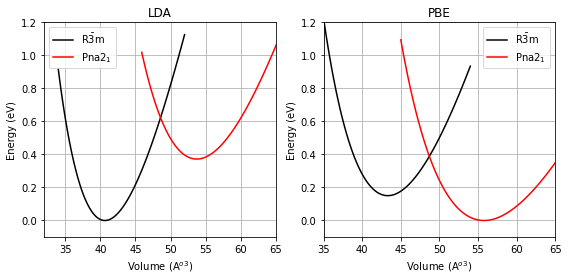

In [224]:
fig,ax1=plt.subplots(1,2,figsize=(8,4))


ax=ax1[0]
ax.set_title("LDA")
import pickle
with open('data_r3m.pickle', 'rb') as handle:
    data = pickle.load(handle)
    
i='r-3m-lda'
v=data[i][0]
e=data[i][1]
c="k";label="R$\\bar{3}$m"
eos_data=eos(v,e,eos='birchmurnaghan').getplotdata()
# ax.plot(eos_data[4],eos_data[5],c=c,label=label)
# ax.scatter(eos_data[6],eos_data[7],alpha=0.5,s=20,c=c,marker="o")
def murnaghan(V, E0, B0, BP, V0):
    'From PRB 28,5480 (1983'

    E = E0 + B0 * V / BP * (((V0 / V)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1)
    return E
eos_data=eos(v,e,eos='murnaghan')
eos_data.fit()
V=np.linspace(34,52,100)
E=murnaghan(V,eos_data.eos_parameters[0],eos_data.eos_parameters[1],eos_data.eos_parameters[2],eos_data.eos_parameters[3])
minimum=np.min(E)
ax.plot(V,E-minimum,c=c,label=label)
with open('data_pn21.pickle', 'rb') as handle:
    data = pickle.load(handle)
    
i='pn21-lda'
v=np.array(data[i][0])*0.25
e=np.array(data[i][1])*0.25
c="r";label="Pna$2_1$"
eos_data=eos(v,e,eos='birchmurnaghan').getplotdata()
n=8
ax.plot(eos_data[4][n:],eos_data[5][n:]-minimum,c=c,label=label)
# ax.scatter(eos_data[6],eos_data[7],alpha=0.5,s=20,c=c,marker="o")
ax.legend()
ax.set_xlim(32,65)
ax.set_ylim(-.1,1.2)

ax=ax1[1]
ax.set_title("PBE")
plot_gga(ax)
ax.set_ylim(-.1,1.2)
ax.set_xlim(35,65)

for i in ax1:
    i.set_ylabel("Energy (eV)")
    i.set_xlabel("Volume (A$^{o3}$)")
    i.grid()
plt.tight_layout()
plt.savefig("E-V.png",dpi=300)

/Users/santy/miniconda3/lib/python3.8/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.array(obj)
/Users/santy/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


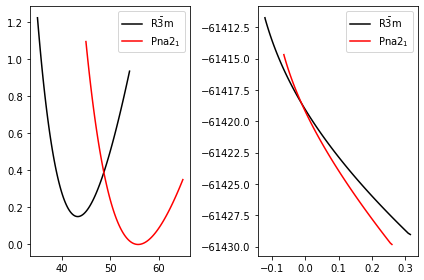

In [38]:
def plot_gga(ax,ax1):
    def murnaghan(V, E0, B0, BP, V0):
        'From PRB 28,5480 (1983'

        E = E0 + B0 * V / BP * (((V0 / V)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1)
        return E
    traj = Trajectory('nagao2-r3m-gga.traj')
    v=[i.get_volume() for i in traj]
    e1=np.array([i.get_total_energy() * Rydberg for i in traj])
    eos_data=eos(v,e1,eos='murnaghan')
    eos_data.fit()
    V=np.linspace(35,54,100)
    E=murnaghan(V,eos_data.eos_parameters[0],eos_data.eos_parameters[1],eos_data.eos_parameters[2],eos_data.eos_parameters[3])
    r3m_e=E;r3m_v=V


    traj = Trajectory('nagao2-p2n1_gga.traj')
    v=[i.get_volume()*0.25 for i in traj]
    e1=np.array([i.get_total_energy() * Rydberg*0.25 for i in traj])
    eos_data=eos(v,e1,eos='murnaghan')
    eos_data.fit()
    V=np.linspace(45,65,100)
    E=murnaghan(V,eos_data.eos_parameters[0],eos_data.eos_parameters[1],eos_data.eos_parameters[2],eos_data.eos_parameters[3])
    p2n1_e=E;p2n1_v=V

    minimum=np.min([r3m_e,p2n1_e])
    c="k";label="R$\\bar{3}$m"
    ax.plot(r3m_v,r3m_e-minimum,c=c,label=label)
    c="r";label="Pna$2_1$"
    ax.plot(p2n1_v,p2n1_e-minimum,c=c,label=label)
    ax.legend()
    
    c="k";label="R$\\bar{3}$m"
    p=-1*np.gradient(r3m_e,np.diff(r3m_v)[0])
    h=r3m_e-p*r3m_v
    h1=h
    p1=p
    ax1.plot(p,h,c=c,label=label)

    
    c="r";label="Pna$2_1$"
    p=-1*np.gradient(p2n1_e,np.diff(p2n1_v)[0])
    h=p2n1_e-p*p2n1_v
    h2=h
    p2=p
    ax1.plot(p,h,c=c,label=label)
    ax1.legend()
    return h1,h2,p1,p2
    
    
fig,ax=plt.subplots(1,2)
h1,h2,p1,p2=plot_gga(ax[0],ax[1])
plt.tight_layout()

(-0.05, 0.05)

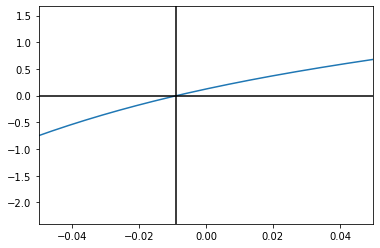

In [7]:
p=np.linspace(-.1,.15,200)
h1p = np.poly1d(np.polyfit(p1, h1, 4))
h2p = np.poly1d(np.polyfit(p2, h2, 4))
plt.plot(p,h1p(p)-h2p(p))
plt.axhline(0,c="k")
plt.axvline(-.009,c="k")
plt.xlim(-.05,.05)

In [1]:
-.009*160.2

-1.4417999999999997

/Users/santy/miniconda3/lib/python3.8/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.array(obj)
/Users/santy/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


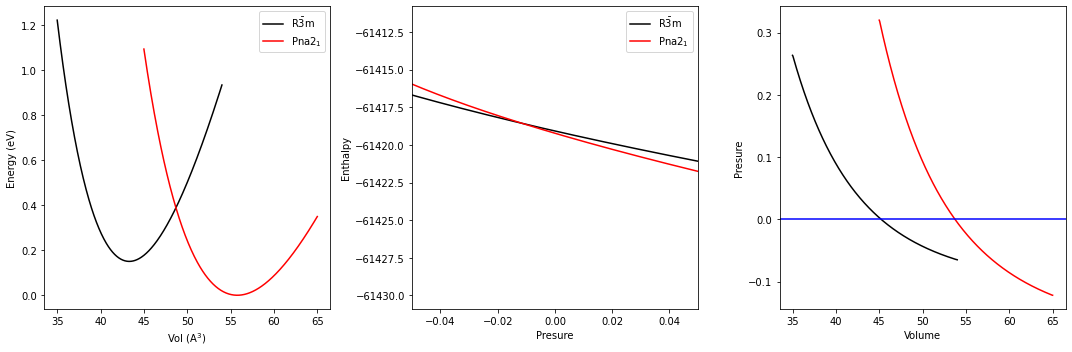

In [34]:
def plot_gga(ax,ax1):
    def murnaghan(V, E0, B0, BP, V0):
        'From PRB 28,5480 (1983)'

        E = E0 + B0 * V / BP * (((V0 / V)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1)
        return E
    traj = Trajectory('nagao2-r3m-gga.traj')
    v=[i.get_volume() for i in traj]
    e1=np.array([i.get_total_energy() * Rydberg for i in traj])
    eos_data=eos(v,e1,eos='murnaghan')
    eos_data.fit()
    V=np.linspace(35,54,400)
    E=murnaghan(V,eos_data.eos_parameters[0],eos_data.eos_parameters[1],eos_data.eos_parameters[2],eos_data.eos_parameters[3])
    r3m_e=E;r3m_v=V


    traj = Trajectory('nagao2-p2n1_gga.traj')
    v=[i.get_volume()*0.25 for i in traj]
    e1=np.array([i.get_total_energy() * Rydberg*0.25 for i in traj])
    eos_data=eos(v,e1,eos='murnaghan')
    eos_data.fit()
    V=np.linspace(45,65,400)
    E=murnaghan(V,eos_data.eos_parameters[0],eos_data.eos_parameters[1],eos_data.eos_parameters[2],eos_data.eos_parameters[3])
    p2n1_e=E;p2n1_v=V

    minimum=np.min([r3m_e,p2n1_e])
    c="k";label="R$\\bar{3}$m"
    ax.plot(r3m_v,r3m_e-minimum,c=c,label=label)
    c="r";label="Pna$2_1$"
    ax.plot(p2n1_v,p2n1_e-minimum,c=c,label=label)
    ax.legend()
    
    c="k";label="R$\\bar{3}$m"
    p=-1*np.gradient(r3m_e,np.diff(r3m_v)[0])
    h=r3m_e-p*r3m_v
    h1=h
    p1=p
    ax1.plot(p,h,c=c,label=label)

    
    c="r";label="Pna$2_1$"
    p=-1*np.gradient(p2n1_e,np.diff(p2n1_v)[0])
    h=p2n1_e-p*p2n1_v
    h2=h
    p2=p
    ax1.plot(p,h,c=c,label=label)
    ax1.legend()
    return h1,h2,p1,p2,p2n1_e,p2n1_v,r3m_e,r3m_v
    
    
fig,ax=plt.subplots(1,3,figsize=(15,5))
h1,h2,p1,p2,p2n1_e,p2n1_v,r3m_e,r3m_v=plot_gga(ax[0],ax[1])
ax[0].set_xlabel("Vol (A$^3$)")
ax[0].set_ylabel("Energy (eV)")

ax[1].set_xlabel("Presure")
ax[1].set_ylabel("Enthalpy")
ax[1].set_xlim(-.05,.05)

ax[2].plot(p2n1_v,p1,c="r")
ax[2].plot(r3m_v,p2,c="k")
ax[2].axhline(0,c="b")
ax[2].set_ylabel("Presure")
ax[2].set_xlabel("Volume")
plt.tight_layout()

In [9]:
traj = Trajectory('nagao2-p2n1_gga.traj')
v=[i.get_volume()*0.25 for i in traj]
e1=np.array([i.get_total_energy() * Rydberg*0.25 for i in traj])
eos_data=eos(v,e1,eos='murnaghan')
eos_data.fit()
eos_data.eos_parameters

array([-6.14192256e+04,  6.33501238e-01,  5.64334729e+00,  5.57709128e+01])

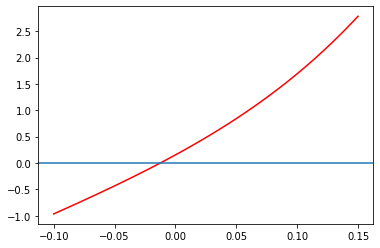

In [17]:
p=np.linspace(-.1,.15,200)
h1p = np.poly1d(np.polyfit(p1, h1, 4))
h2p = np.poly1d(np.polyfit(p2, h2, 4))
plt.plot(p,h1p(p)-h2p(p),c="r")
plt.axhline(0)

In [33]:
# h1,h2,p1,p2,p2n1_e,p2n1_v,r3m_e,r3m_v
print("pres ene vol ent")
for i,j in enumerate(p):
    print("{:3f} {:3f} {:3f} {:3f}".format(p[i],p2n1_e[i],p2n1_v[i],h1[i]))

pres ene vol ent
-0.100000 -61418.131038 45.000000 -61429.029202
-0.098744 -61418.183533 45.202020 -61428.927731
-0.097487 -61418.234154 45.404040 -61428.604558
-0.096231 -61418.282959 45.606061 -61428.287613
-0.094975 -61418.329998 45.808081 -61427.976706
-0.093719 -61418.375324 46.010101 -61427.671658
-0.092462 -61418.418985 46.212121 -61427.372294
-0.091206 -61418.461030 46.414141 -61427.078446
-0.089950 -61418.501504 46.616162 -61426.789952
-0.088693 -61418.540452 46.818182 -61426.506654
-0.087437 -61418.577918 47.020202 -61426.228401
-0.086181 -61418.613944 47.222222 -61425.955046
-0.084925 -61418.648568 47.424242 -61425.686450
-0.083668 -61418.681832 47.626263 -61425.422474
-0.082412 -61418.713773 47.828283 -61425.162986
-0.081156 -61418.744427 48.030303 -61424.907860
-0.079899 -61418.773830 48.232323 -61424.656972
-0.078643 -61418.802016 48.434343 -61424.410203
-0.077387 -61418.829019 48.636364 -61424.167437
-0.076131 -61418.854871 48.838384 -61423.928563
-0.074874 -61418.879603

IndexError: index 100 is out of bounds for axis 0 with size 100

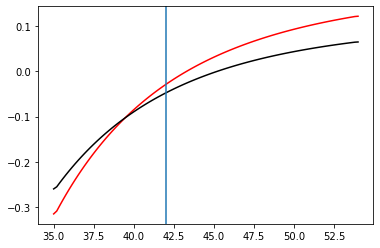

In [12]:
y=np.gradient(r3m_e,np.diff(r3m_v)[0])
plt.plot(r3m_v,y,c="r")
y=np.gradient(p2n1_e,np.diff(p2n1_v)[0])
plt.plot(r3m_v,y,c="k")
plt.axvline(42)
#r3m_e,r3m_v